In [1]:
# set the working directory to be the root of the package
# so that the imports work below
import sys
sys.path.append("..")

In [18]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import models.data_util
import seaborn
import random

In [3]:
data_file = "../data/small.pkl"  # set this accordingly

db = pd.read_pickle(data_file)

# Load the lat/long for each company
x = db[['lat', 'long']].to_numpy()
y = db['isfailed'].to_numpy().reshape((-1,))

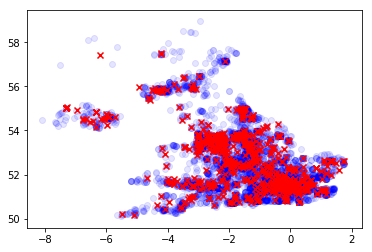

In [4]:
# plot the lat/long of all companies in the dataset:

failedcomps = np.nonzero(y == 1)
notfailedcomps = np.nonzero(y == 0)

# transpose is needed to make the UK look upright!
plt.scatter(x[notfailedcomps].T[1], x[notfailedcomps].T[0],
            marker='o', alpha=0.1, color='blue')
plt.scatter(x[failedcomps].T[1], x[failedcomps].T[0],
            marker='x', alpha=1.0, color='red')
plt.show()

In [5]:
# file path of a cleaned data file (so we can see the difference
# to lat/long)

cleaned_data_file = "../data/clean.pkl"  # set this accordingly

clean_data = pd.read_pickle(cleaned_data_file)

In [6]:
clean_db_failed = clean_data[clean_data['isfailed'] == 1]
clean_db_notfailed = clean_data[clean_data['isfailed'] == 0]

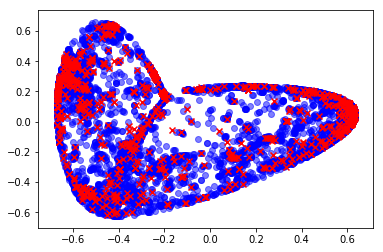

In [7]:
# plot the lat/long of the companies in the cleaned dataset, which has had
# PCA applied to the positions:

plt.scatter(clean_db_notfailed['pos1'].to_numpy(), clean_db_notfailed['pos2'].to_numpy(),
            marker='o', alpha=0.5, color='blue')
plt.scatter(clean_db_failed['pos1'].to_numpy(), clean_db_failed['pos2'].to_numpy(),
            marker='x', alpha=1.0, color='red')
plt.show()

In [8]:
# Now let's examine the following accounting fields:
# Field2267, Field2816, Field972, Field477, Field2823
# These are pesky because they don't have a corresponding hasFN field
# and some of the fields contain strings, too.
from models.feature_util import (accounting_field_nums,
                                 bad_accounting_field_nums)

In [14]:
# As we can see from this, most of these fields are pretty hard to train on:
for n in bad_accounting_field_nums:
    fieldName = 'Field' + str(n)
    fieldNotNone = db[db[fieldName].notna()][fieldName]
    series = fieldNotNone.sample(frac=0.1).to_numpy()
    print(fieldName, ':', series.shape)
    print(series)

Field2267 : (219,)
['' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '']
Field2816 : (11,)
["Turnover represents the total invoice value, excluding value added tax, of sales made during the year and derives from the provision of goods and services falling within the company's ordinary activities."
 'Turnover represents net invoiced sales of services, excluding value added tax.'
 'Rev

Field1014 : 9678 values


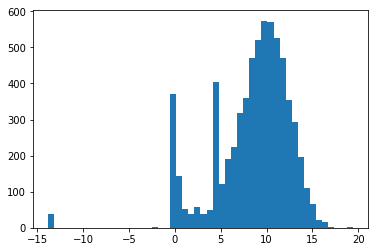

Field1129 : 10687 values


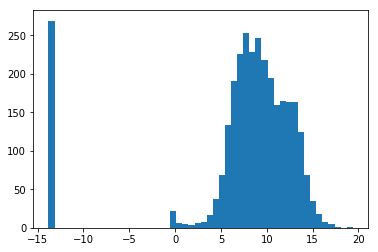

Field1522 : 11180 values


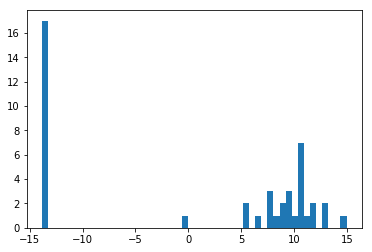

Field1631 : 11094 values


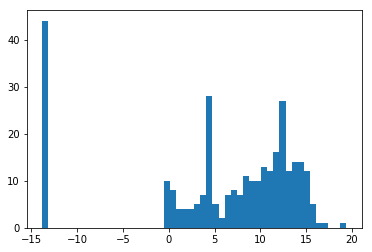

Field17 : 11171 values


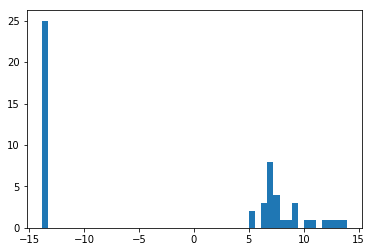

Field1865 : 10025 values


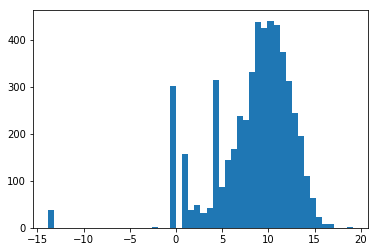

Field1871 : 10951 values


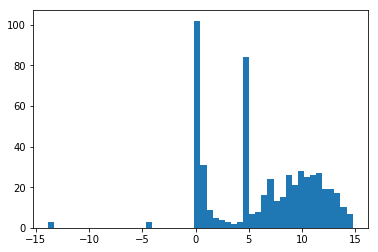

Field1885 : 10488 values


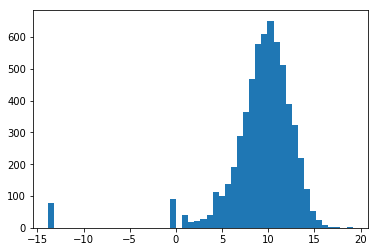

Field1977 : 11196 values


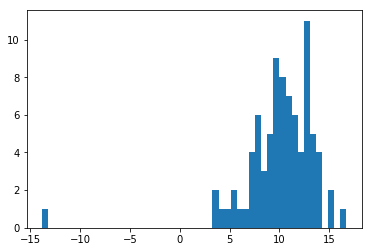

Field2298 : 11195 values


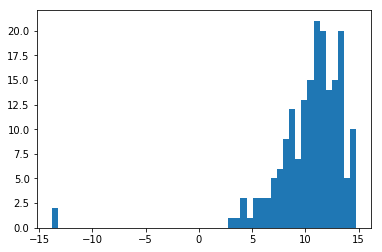

Field2304 : 11195 values


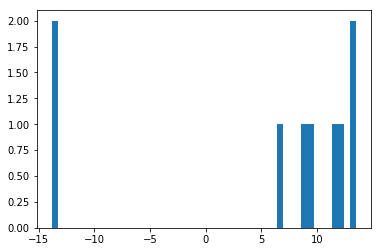

Field2316 : 10973 values


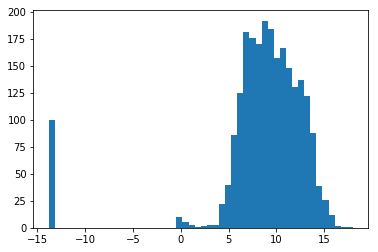

Field2447 : 11184 values


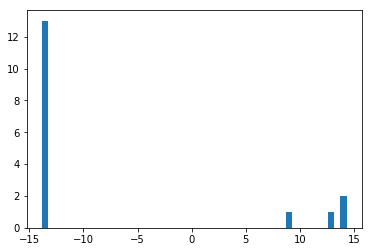

Field2483 : 11196 values


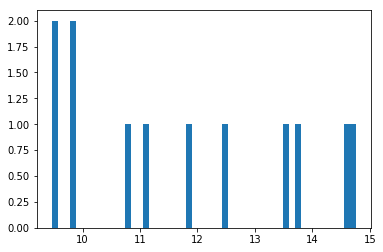

Field2497 : 10927 values


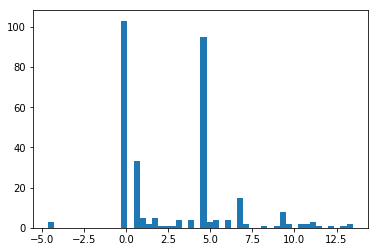

Field2502 : 10956 values


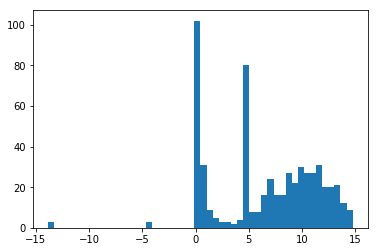

Field2815 : 11196 values


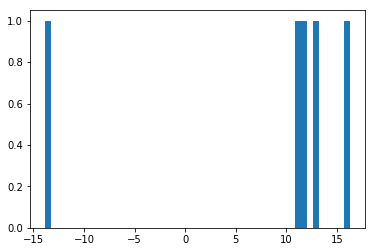

Field282 : 11192 values


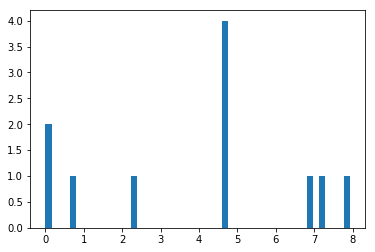

Field306 : 10588 values


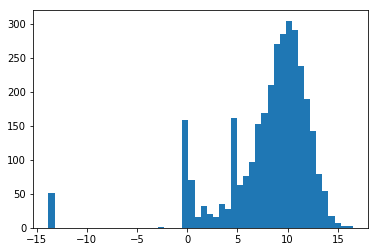

Field448 : 11194 values


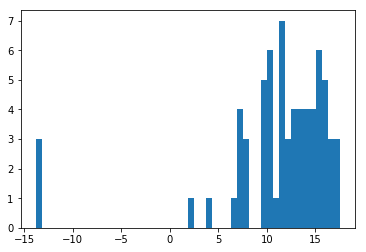

Field465 : 10880 values


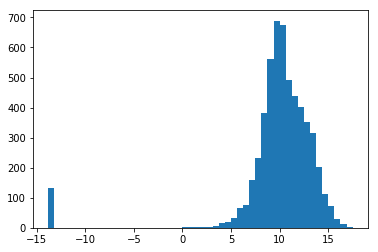

Field474 : 11178 values


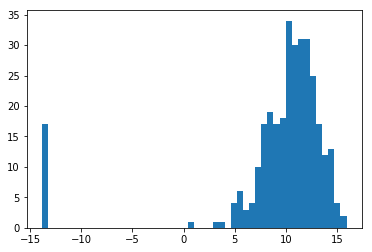

Field487 : 11160 values


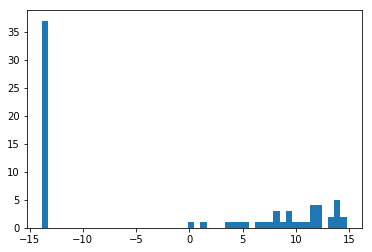

Field489 : 10757 values


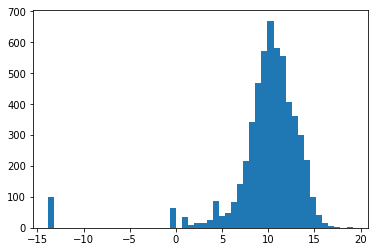

Field541 : 10919 values


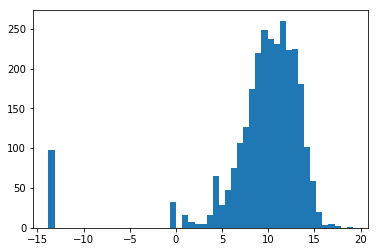

Field69 : 11185 values


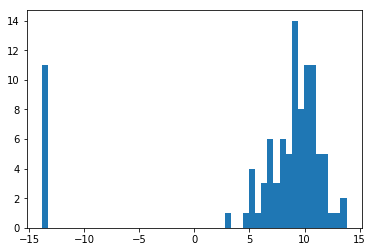

Field70 : 11183 values


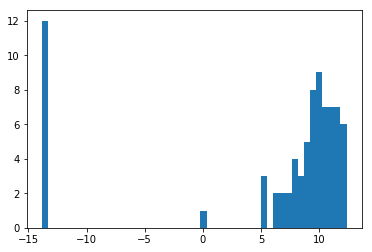

In [32]:
# Now examine the "good" accounting fields:
acc_field_names = ['Field' + str(n) for n in accounting_field_nums]
for field_name in acc_field_names:
    col_data = db[field_name].to_numpy()
    print(field_name, ':', len(np.unique(col_data)), 'values')
    col_data = np.log(col_data + 1.0e-6)  # plot on log scale
    plt.hist(col_data, bins=50)
    plt.show()